## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer:
1. Is a person who answered high on Q9 about liking guns more likely to be left handed?
2. Does an association exist between left handedness and playing alot of video games?
3. As femininity scores increase does rate left handedness vegetarianism?


---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('data.csv',delimiter = '\\t')

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
data = pd.DataFrame(data)



In [4]:
data.shape

(4184, 56)

In [5]:
data.fillna(0,inplace=True)

In [6]:
data.Q1.value_counts()

1    2521
3     494
4     461
2     385
5     319
0       4
Name: Q1, dtype: int64

### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

1. I would leave out names
2. Or other identifying information to keep things anonymous
3. I might use a portion of the data to generalize about the other part, likea test split and see if values are proportional.

---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [7]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,introelapse,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,2.748805,2.852772,2.657505,3.334130,3.168021,2.930210,2.564771,3.424952,2.928537,3.639818,2.867591,3.595124,3.861138,3.337237,1.999761,3.001434,2.730641,2.624044,2.543738,2.894359,3.002151,2.869503,2.741874,3.022228,3.074092,2.610660,3.465344,2.798757,2.569312,2.984226,3.385277,2.704828,2.676386,2.736616,347.808556,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,1.443078,1.556284,1.559575,1.522866,1.501683,1.575544,1.619010,1.413236,1.493122,1.414569,1.360858,1.354475,1.291425,1.426095,1.290747,1.480610,1.485883,1.481709,1.611428,1.477968,1.420032,1.659141,1.405670,1.562694,1.546400,1.409707,1.521460,1.413584,1.621772,1.483752,1.423055,1.544345,1.523097,1.471845,5908.901681,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,6.000000,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,2.000000,4.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,1.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,2.000000,3.000000,4.000000,3.000000,3.000000,3.000000,12.000000,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,35.000000,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.00

In [8]:
data = data[data['age'] < 100]
data = data[data['age'] > 0]
data = data[data['testelapse'] > 180]


In [9]:
data.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

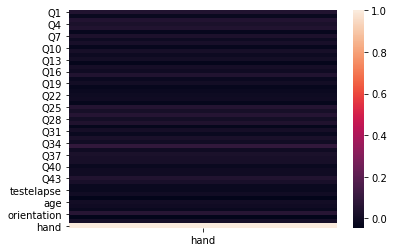

In [10]:
#gen_corr = data.corr()['gender']
sns.heatmap(pd.DataFrame(data.corr()['hand']))


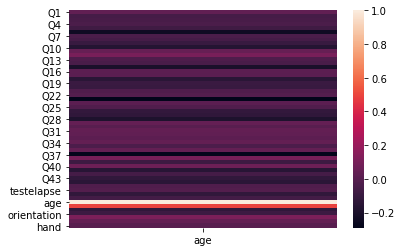

In [11]:
sns.heatmap(pd.DataFrame(data.corr()['age']))

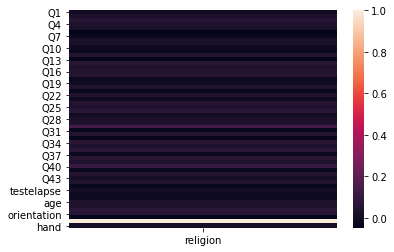

In [12]:
sns.heatmap(pd.DataFrame(data.corr()['religion']))


(array([   9.,    0.,    0., 2770.,    0.,    0.,  335.,    0.,    0.,
         129.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

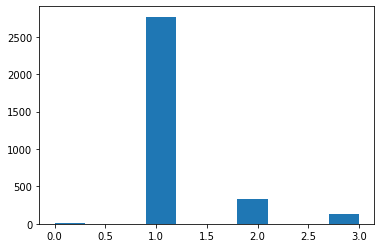

In [14]:
plt.hist(data.hand)

In [15]:
col = []
col_list = list(data.columns)
for i,v in enumerate(col_list):
    if i <= 43:
        col.append(v)
    


In [16]:
data = pd.get_dummies(data, columns = ['country'], drop_first=True)

In [17]:
data.columns


Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10',
       ...
       'country_UA', 'country_US', 'country_UY', 'country_UZ', 'country_VE',
       'country_VI', 'country_VN', 'country_ZA', 'country_ZM', 'country_ZW'],
      dtype='object', length=143)

In [18]:
colors = ['red', 'green', 'blue','orange','brown','black']
color_series = data['hand'].map(lambda s: colors[s])


In [19]:
#sns.pairplot(data['Q1'], hue='hand')


---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Classification because we are predicting a discrete quantity.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

If the variables have different ranges and we dont scale them each variable won't be interpreted correctly. we need the variables to be on the same scale.

### 7. Give an example of when we might not standardize our variables.

If all the variables are already on the same scale for example of every one was a metric between 1 and 5. There would be no need to scale.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

No, everything has the same scale

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [20]:
data['left_handed'] = (data['hand'] == 2).astype(int)

In [21]:
data['left_handed'].value_counts(normalize=True)

0    0.896701
1    0.103299
Name: left_handed, dtype: float64

In [22]:
(data['hand'] == 2).value_counts(normalize=True)

False    0.896701
True     0.103299
Name: hand, dtype: float64

In [23]:
data.isnull().sum().sum()

0

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

We dont want to choose an even number in order to reduce ties, also we may want to choose a higher number because left hand values are only 10% of the total

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [24]:
X = data.drop(['left_handed', 'hand'], axis = 'columns')
y = data['left_handed']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.33,
                                                    random_state = 42,
                                                    stratify = y) 

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
cross_val_score(knn, X_train, y_train, cv=10).mean()


0.8636989709237415

In [27]:
knn.fit(X_train, y_train)
print('Train Score is {}'.format(knn.score(X_train, y_train)))
print('Test Score is {}'.format(knn.score(X_test, y_test)))

Train Score is 0.9033149171270718
Test Score is 0.8627450980392157


This model is overfit

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
cross_val_score(knn, X_train, y_train, cv=10).mean()

0.882582547668372

In [29]:
knn.fit(X_train, y_train)
print('Train Score is {}'.format(knn.score(X_train, y_train)))
print('Test Score is {}'.format(knn.score(X_test, y_test)))

Train Score is 0.8968692449355433
Test Score is 0.8832866479925303


Still overfit but less so, it is also more accurate.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 15)
cross_val_score(knn, X_train, y_train, cv=10).mean()

In [30]:
knn.fit(X_train, y_train)
print('Train Score is {}'.format(knn.score(X_train, y_train)))
print('Test Score is {}'.format(knn.score(X_test, y_test)))

0.8968747993755393

This model is balanced.

In [33]:
knn = KNeighborsClassifier(n_neighbors = 25)
cross_val_score(knn, X_train, y_train, cv=10).mean()

0.8968747993755393

In [34]:
knn.fit(X_train, y_train)
print('Train Score is {}'.format(knn.score(X_train, y_train)))
print('Test Score is {}'.format(knn.score(X_test, y_test)))

Train Score is 0.8968692449355433
Test Score is 0.896358543417367


Adding more neighbors didnt effect the outcome at all. The optimal neighbors is 15.

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

The default regularization is L2 with a C of 1.0

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

It is not neccesary for Logistic Regression but is recommended for Lasso and Ridge Regularization

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

In [39]:
ss = StandardScaler()
Z_train = ss.fit_transform(X_train)
Z_test = ss.transform(X_test)



In [104]:
lasso = LogisticRegression(penalty = 'l1',C = 1)

lasso.fit(Z_train, y_train)
print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))


0.899171270718232
0.8935574229691877


/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [85]:
lasso = LogisticRegression(penalty = 'l1',C = .1)

lasso.fit(Z_train, y_train)
print(lasso.score(Z_train, y_train))
print(lasso.score(Z_test, y_test))

0.8987108655616943
0.8954248366013072


/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [87]:
ridge = LogisticRegression(penalty = 'l2',C = 1)

ridge.fit(Z_train, y_train)
print(ridge.score(Z_train, y_train))
print(ridge.score(Z_test, y_test))


0.8987108655616943
0.8935574229691877


/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
ridge_10 = LogisticRegression(penalty = 'l2',C = .1)

ridge_10.fit(Z_train, y_train)
print(ridge_10.score(Z_train, y_train))
print(ridge_10.score(Z_test, y_test))



0.899171270718232
0.8935574229691877


/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

I dont think they will do a good job of predicting. There is no reason to assume that any external factors influence whether someone is left handed.

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

|             | Train r2 | Test r2 |
|:-----------:|----------|---------|
| KNN - 3     | 0.9033   | .8627   |
| KNN - 5     | .8968    | .8833   |
| KNN - 15    | .8969    | .8964   |
| KNN - 25    | .8969    | .8964   |
| Lasso - 1   | .8992    | .8936   |
| Lasso - 10  | .8987    | .8954   |
| Ridge - 1   | .8987    | .8936   |
| Ridge  - 10 | .8992    | .8936   |

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

 - The Knn with 3 neighbors is overfit
 - The KNN with 5 neighbors is also slightly overfit
 - The Risge and Lasso are not overfit

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

As Knn increases to 15 the bias - variance tradeoff reaches its equilibrium at 15.

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

- We can reduce the number of features. 
- We can look for mislabled data points as they will greatly reduce the bias of the model.
- Raise the k.

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

All the models are slightly overfit as the training r2 score is higher than the test score. 

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

As C increases the regularization gets stronger and it pulls the model towards a the optimal bias-variance tradeoff. 

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

As C gets larger the difference. between trainng and testing scores gets smaller because the model is regularizing harder.
Once the model gets to the optimal C, the cofficients don't change at all. In the case of the ridge, its alpha 10.




### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

1. Scale the data
2. Use a regularization like ridge or lasso
3. Use a larger test set to fit, this will increase the information your model has to work with.


---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Knn because you would be examining the relationship that exists among many variables, instead of a binary 1,0 choice.

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

In [117]:
lasso = LogisticRegression(penalty = 'l1',C = 1)

lasso.fit(Z_train, y_train)


/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
(lasso.coef_)

array([[-0.13733137,  0.04664155, -0.08600871, -0.03148522,  0.12831578,
         0.02352161, -0.03982599, -0.11895493, -0.02229498,  0.01034028,
         0.09111732,  0.01172886, -0.13182669,  0.05646442, -0.03725333,
         0.04455392,  0.04994891,  0.01818301, -0.11287298, -0.09811216,
        -0.02491288, -0.02197248, -0.02095213,  0.00511596,  0.12914163,
         0.10448368, -0.12798126,  0.0414767 ,  0.14353565,  0.07754129,
         0.03024824, -0.11469073, -0.04949372, -0.02665692, -0.06078062,
        -0.00211285, -0.08517907,  0.        ,  0.        , -0.20488128,
        -0.03684802, -0.10264475,  0.06795732, -0.15677242, -0.44322108,
         0.        , -0.04456306,  0.        ,  0.07021863,  0.0550616 ,
        -0.17244344,  0.15952269, -0.03738107,  0.02179151,  0.        ,
         0.10960632, -0.03477997,  0.06589741, -0.07790135,  0.06328727,
        -0.0389137 , -0.15916105,  0.07474926,  0.10080367, -0.13610664,
        -0.11438048,  0.08731997,  0.        ,  0.0

In [142]:
np.exp(-0.13733137/(1-0.13733137))


0.8528311901905784

For every 1 point increase in question 1, the likelyhood of that person being left handed decreases by .85 times. 

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

 - I am picking Logistic Regression with Lasso Regularization and an alpha of 1, because this model has close highest r2 score, meaning the amount of variance in y that  was explained by our model, making it close to the most accurate.
 - %89.36 variance was explained and there was only a .05 difference between training and testing, meaning that the alpha and bias-variance tradeoff were correctly determined.
 - Even though the knn was a little bit better, I want to be able to see the coefficents for each one.



### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

In [160]:
lasso = LogisticRegression(penalty = 'l1',C = 1)

lasso.fit(Z_train, y_train)

/Users/aryehgelfand/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [163]:
lasso.coef_
np.exp(-0.03684699/(1-0.03684699))

0.9624659099062447

My model predicted that for every point higher answered on Q9 meaning 1 point more into guns, made that person .96 times less likely to be left handed. 

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)